<AxesSubplot:ylabel='hwy'>

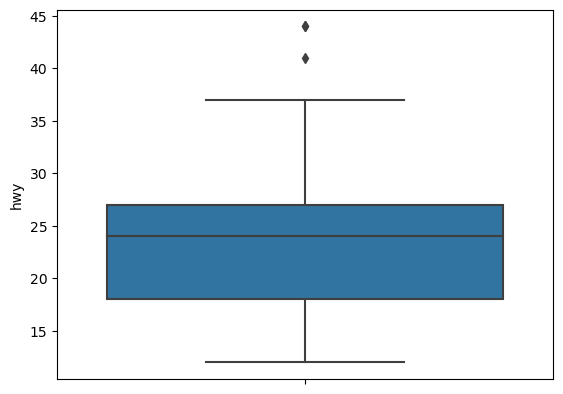

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

mpg = pd.read_csv('mpg.csv')
sns.boxplot(data = mpg, y= 'hwy')

In [2]:
# 하위 25%에 해당하는 1사분위수
pct25 = mpg['hwy'].quantile(.25)
pct25

18.0

In [3]:
# 하위 75%에 해당하는 3사분위수
pct75 = mpg['hwy'].quantile(.75)
pct75

27.0

In [4]:
# IQR(inter quartile range) 사분위 범위
iqr = pct75 - pct25
iqr

9.0

In [5]:
# 하한 d = 1사분위수보다 'IQR의 1.5배'만큼 작은 값
# 상한 u = 3사분위수보다 'IQR의 1.5배'만큼 큰 값
d = pct25 - iqr * 1.5
u = pct75 + iqr * 1.5
print(d,u)

4.5 40.5


In [7]:
# 4.5 ~ 40.5 벗어나면 NaN 부여
mpg['hwy'] = np.where((mpg['hwy']<4.5) | (mpg['hwy'] >40.5),
                     np.nan, mpg['hwy'])

# 결측치 빈도 확인
mpg['hwy'].isna().sum()

3

In [9]:
mpg.dropna(subset = ['hwy'])\       # hwy 결측치 제거
    .groupby('drv')\                # drv별 분리
    .agg(mean_hwy = ('hwy','mean')) # hwy 평균 구하기

,mean_hwy
drv,
4,19.174757
f,27.728155
r,21.000000
